In [15]:
#IMPORTS
%run ../datuslib.ipynb

In [62]:
#SETTINGS
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
#CARGA DATA

A_tweets = pd.read_csv(generateAbsolutePath("train.csv", exists = True))

In [17]:
#CARGA DE INTERNET PALBRAS NEGATIVAS

A_NEGATIVE_WORDS = getWordInListFromFile('negativeWords.txt')

In [18]:
#CREO EL OBJETO CONTEXT
context = Context(data = A_tweets, load = 'A_context')

Data loaded
Texts loaded
Words loaded
English Words loaded
Non English Words loaded
Nouns loaded
Word Net loaded
Disaster Frequency map loaded
Total Frequency map loaded
Noun Negativity map loaded
Contextual map loaded
English Truncated Contextual map loaded


# PLOT: Sustantivos en ingles mas usados

In [69]:
#CREANDO UN DATAFRAME DE SUSTANTIVOS/FRECUENCIAS

A_nounsDF = getDataFrameOfFrecuencies('Palabras',context.nouns)

A_TOP_AMOUNT = 15
A_topNouns = A_nounsDF.head(A_TOP_AMOUNT)

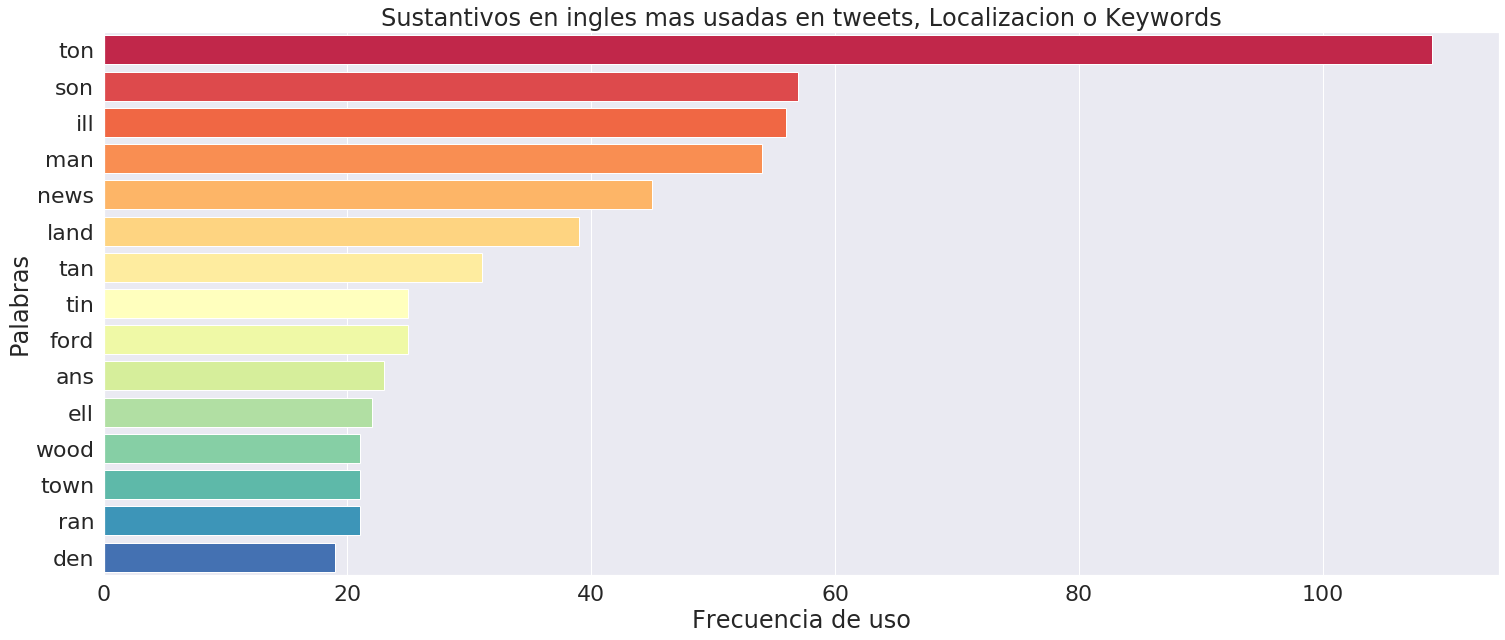

In [70]:
barplot('Cantidad','Palabras', A_topNouns, xLabel = 'Frecuencia de uso', 
        title = 'Sustantivos en ingles mas usadas en tweets, Localizacion o Keywords', fontSize = 2)

# PLOT: Sustantivos en ingles negativos mas usadas

    En este plot se esta usando como palabras negativas a plabras buscadas en internet

In [32]:
#CREANDO UN DATAFRAME DE SUSTANTIVOS NEGATIVOS/FRECUENCIAS

A_NegativeNounsDF = A_nounsDF[ A_nounsDF.apply(lambda row : isIn(row['Palabras'],A_NEGATIVE_WORDS), axis = 1)]

A_TOP_AMOUNT = 15
A_topNouns = A_NegativeNounsDF.head(A_TOP_AMOUNT)

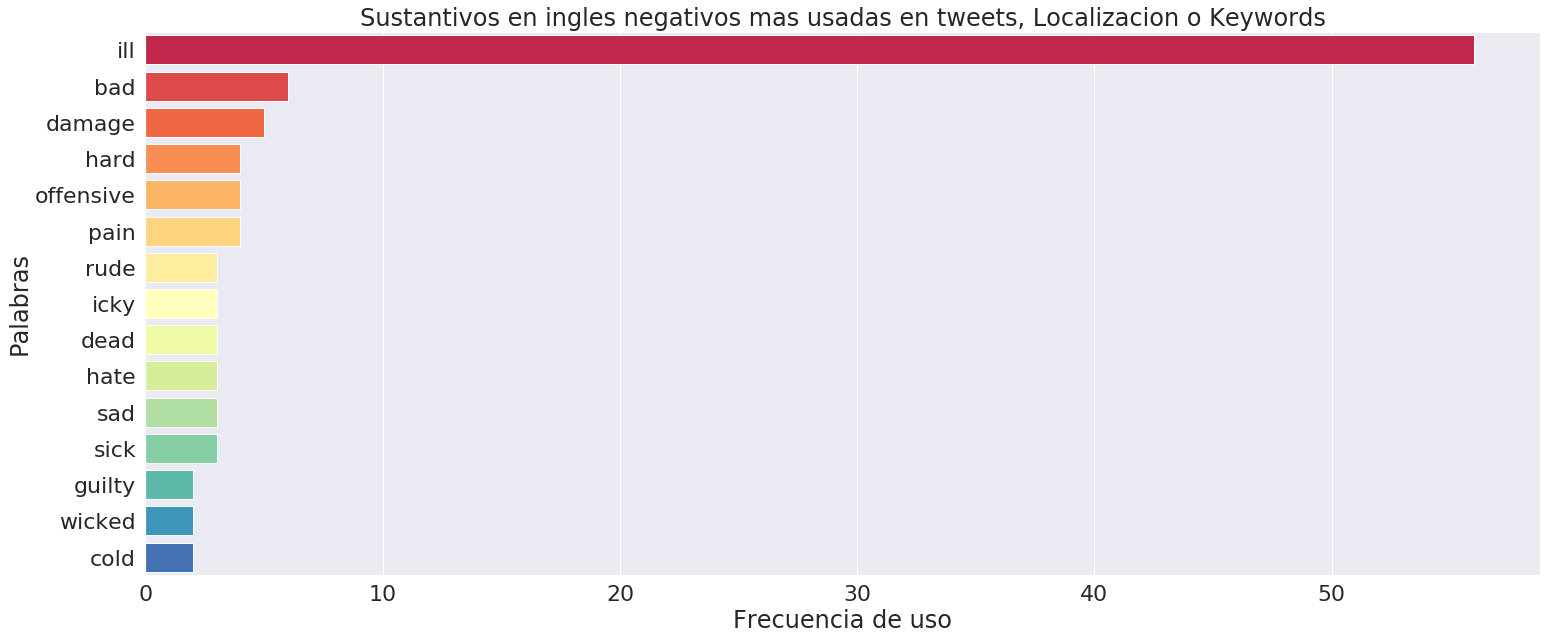

In [33]:
barplot('Cantidad','Palabras', A_topNouns, xLabel = 'Frecuencia de uso', 
        title = 'Sustantivos en ingles negativos mas usadas en tweets, Localizacion o Keywords', fontSize = 2)

# PLOT: Sustantivos en ingles mas usados en tweets de desastres

    En este plot se esta usando como palabras negativas a plabras buscadas en internet

In [34]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO TEXT, KEYWORD y LOCATION DET TWEETS CON DESASTRE

A_tweetsDisaster = A_tweets[A_tweets['target'] == 1]

A_wordsDisasters = dicToDataFrame(context.disasterNounFrequency)
A_wordsDisasters['values'] = round(A_wordsDisasters['values'] * A_tweets.shape[0])

A_TOP_AMOUNT = 15
A_topWords = A_wordsDisasters.head(A_TOP_AMOUNT)

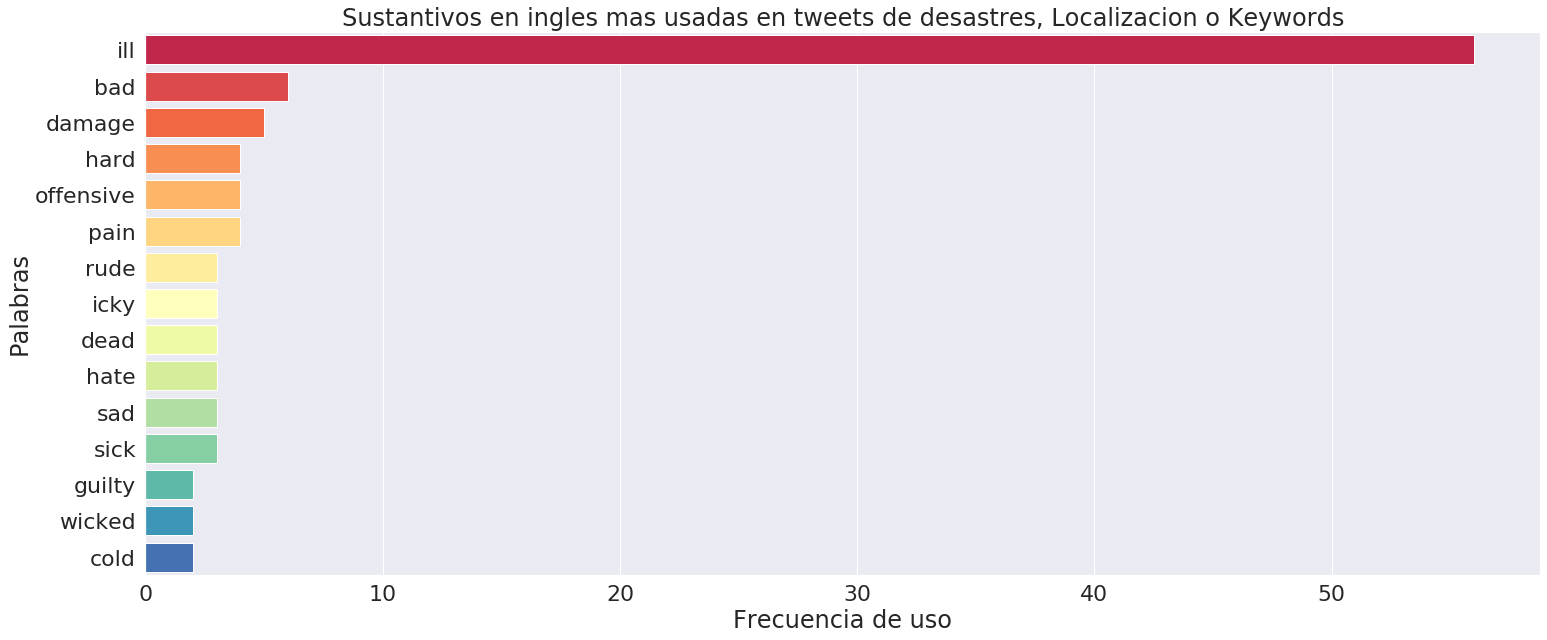

In [35]:
barplot('Cantidad','Palabras', A_topNouns, xLabel = 'Frecuencia de uso', 
        title = 'Sustantivos en ingles mas usadas en tweets de desastres, Localizacion o Keywords', fontSize = 2)

# PLOT: Relacionando negatividad de los tweets y su longitud con si son desastres o no

In [26]:
#MOLDEANDO DATA
A_tweets1 = A_tweets.copy()

#(AGREGA) CAMPO DE TARGET CON NOMBRES MAS DETALLADOS QUE 1 o 0
A_tweets1['Categoria'] = A_tweets1.apply(lambda row : mapBinaryLabel(row['target'],
                                                                            ['Desastre','No Desastre']), axis = 1)
#(AGREGA) CAMPO DE LONGITUD DE TWEETS
A_tweets1['length'] = A_tweets1.apply(lambda row : len(row['text']), axis = 1)

#(AGREGA) CAMPO DE PALABRAS NEGATIVAS
A_tweets1['usa palabras negativas'] = A_tweets1.apply(lambda row : mapBinaryLabel(hasCertainWords(row['text'],A_NEGATIVE_WORDS),['Usa Palabras Negativas','No Usa Palabras Negativas']), axis = 1)


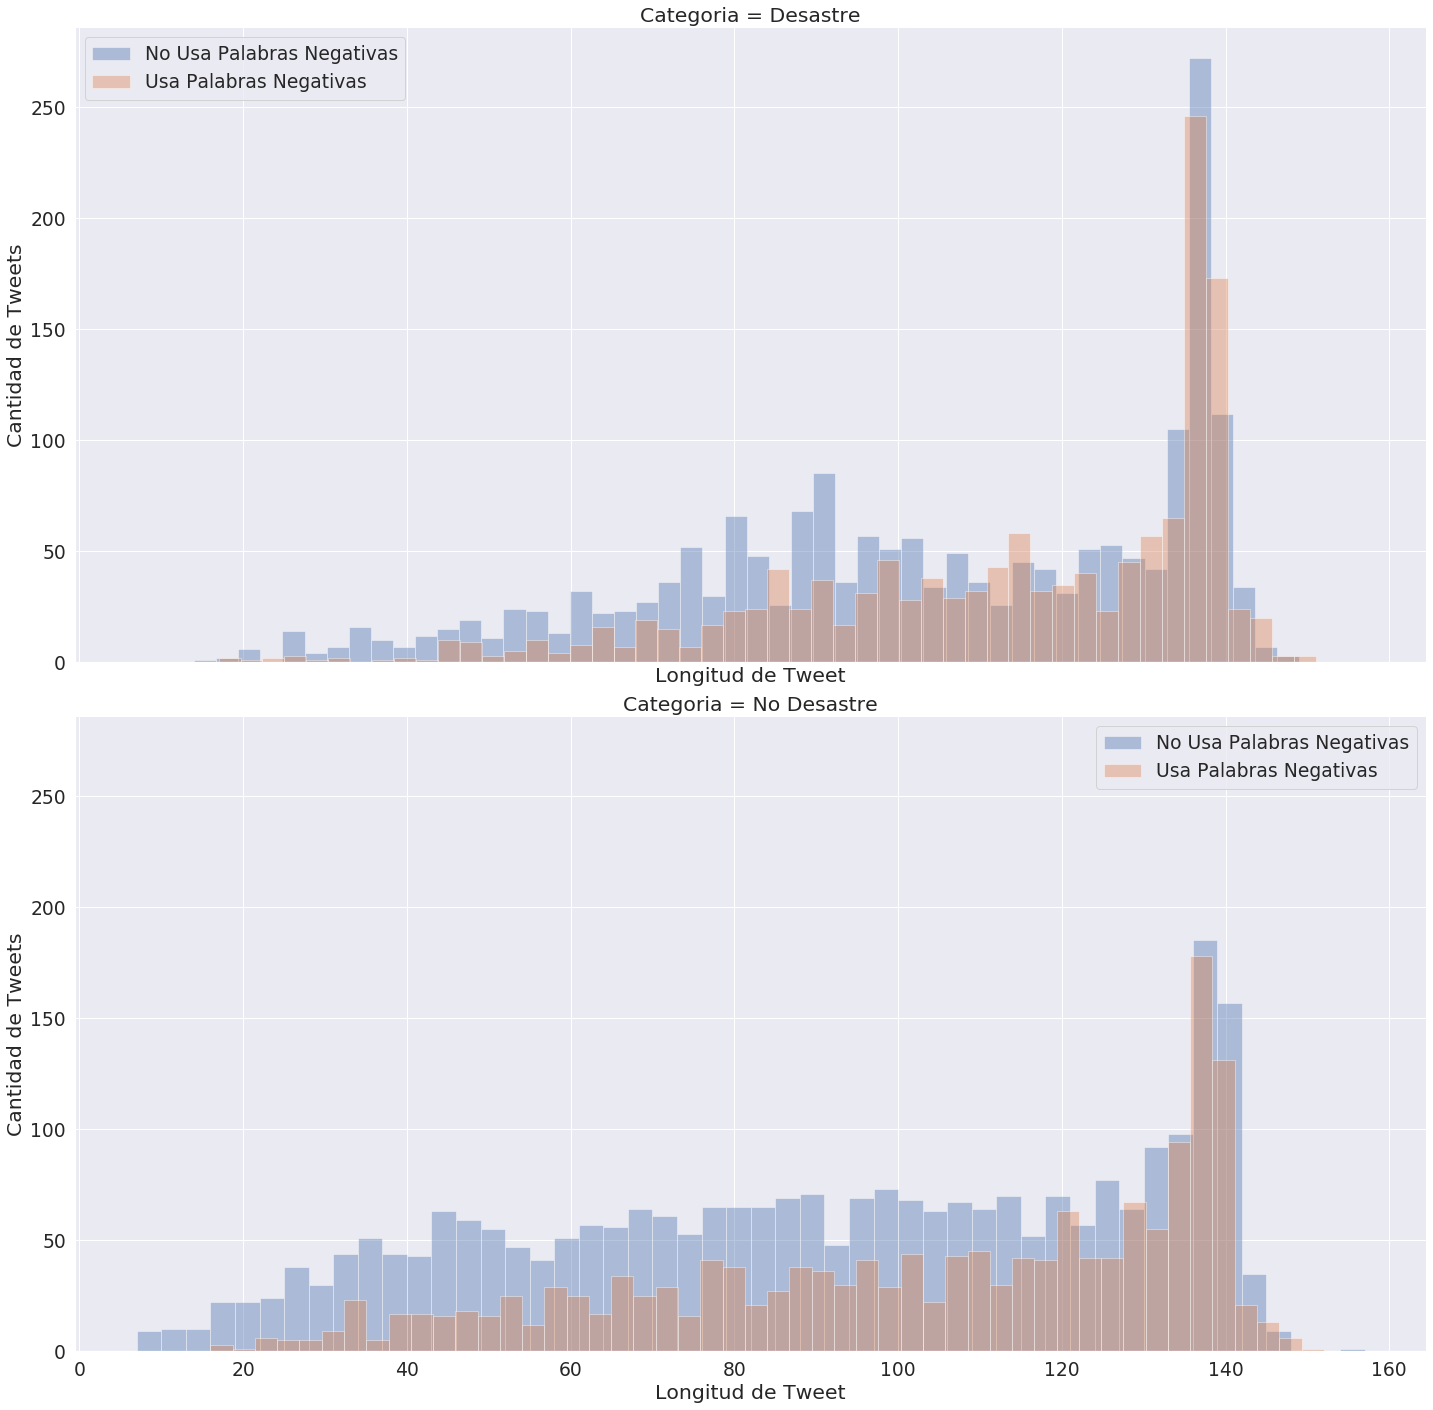

In [27]:
sns.set(font_scale = 1.7)
fg1 = sns.FacetGrid(A_tweets1, hue = 'usa palabras negativas',row = 'Categoria', height = 10, aspect = 2)
v = fg1.map(sns.distplot, "length", kde = False, bins = 50 )


for ax in v.axes.ravel():
    ax.legend()
    ax.set(xlabel = 'Longitud de Tweet', ylabel = 'Cantidad de Tweets')


# Analisis: 

Parece que en el caso de los desastres no parece haber diferencia en los tweets en cuanto a si usa o no palabras negativas (salvo en aquellos de longitud media que parecen tener un pequeña tendencia a ser mas neutros que negativos)

Por otro lado, en el caso de los no desastres, es claro que predominan en cualquier longitud de tweet (salvo en los largos) los tweets neutros







# FEATURE: Agregando escala de negatividad de un tweet (0 es nada y 1 es pura)